In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics
from scipy import stats

In [11]:
train = pd.read_csv("desktop/train.csv")
test = pd.read_csv("desktop/test.csv")

In [12]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [18]:
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
None


In [17]:
#age, cabin, fare embarked missing values

In [19]:
#based of https://www.kaggle.com/sinansonmez35/survival-of-titanic-passengers-with-knn
#Age - empty data is filled with mean of age by passenger class breakdown
#Embarked - empty data is filled with mode of rest of the data
#Fare - empty data is filled with median of rest of the data

#dropped column name, passenger ID and ticket they not related to survival chance and cabin should also be 
#inline with fare data so using only fare data



In [22]:
train['Age'].fillna(train['Age'].median(), inplace=True)
test['Age'].fillna(test['Age'].median(), inplace=True)

In [23]:
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)
test['Fare'].fillna(test['Fare'].median(), inplace=True)

In [24]:
print('Number of empty cells in train data: ')
print(train.isnull().sum())
print('Number of empty cells in test data: ')
print(test.isnull().sum())

Number of empty cells in train data: 
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64
Number of empty cells in test data: 
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


In [25]:
drop_columns = ['Cabin', 'PassengerId', 'Ticket', 'Name']
train = train.drop(drop_columns, axis=1)
test = test.drop(drop_columns, axis=1)

In [26]:
# also gave idea to change non numeric colums to numeric 0/1/2 etc... based on number of options


In [28]:
train['Sex'] = train['Sex'].map({'female': 0, 'male': 1}).astype(int)
test['Sex'] = test['Sex'].map({'female': 0, 'male': 1}).astype(int)
train['Embarked'] = train['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)
test['Embarked'] = test['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)


In [29]:
print(train.head())

   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0         0       3    1  22.0      1      0   7.2500         0
1         1       1    0  38.0      1      0  71.2833         1
2         1       3    0  26.0      0      0   7.9250         0
3         1       1    0  35.0      1      0  53.1000         0
4         0       3    1  35.0      0      0   8.0500         0


In [31]:
X = train.iloc[:, 1:5].values
Y = train.iloc[:, 0].values

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.4, random_state=4)

In [34]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(534, 4)
(357, 4)
(534,)
(357,)


In [50]:
from sklearn.neighbors import KNeighborsClassifier
k_range = range(1,26)
scores =[]
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,Y_train)
    Y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(Y_test,Y_pred))
print(scores)

[0.7310924369747899, 0.7899159663865546, 0.7563025210084033, 0.7787114845938375, 0.7619047619047619, 0.7759103641456583, 0.7619047619047619, 0.7787114845938375, 0.7647058823529411, 0.7899159663865546, 0.7647058823529411, 0.773109243697479, 0.7535014005602241, 0.7507002801120448, 0.7507002801120448, 0.7535014005602241, 0.7675070028011205, 0.7394957983193278, 0.7226890756302521, 0.7282913165266106, 0.7366946778711485, 0.7198879551820728, 0.742296918767507, 0.7170868347338936, 0.7226890756302521]


In [81]:
#helped build knn models and check for k value 
#https://medium.com/analytics-vidhya/titanic-machine-learning-by-k-nearest-neighbors-knn-algorithm-530d8bdd8323
    

Text(0, 0.5, 'Acc')

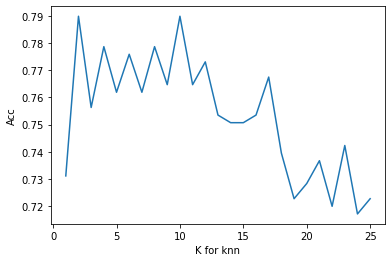

In [54]:
plt.plot(k_range,scores)
plt.xlabel('K for knn')
plt.ylabel('Acc')

In [56]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,Y_train)
Y_pred = knn.predict(X_test)
print(metrics.accuracy_score(Y_test,Y_pred))

0.7563025210084033


In [57]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,Y_train)
Y_pred = knn.predict(X_test)
print(metrics.accuracy_score(Y_test,Y_pred))

0.7899159663865546


In [72]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train,Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(metrics.accuracy_score(Y_test,Y_pred)*100, 2)
print(acc_knn)

76.47


In [73]:
from sklearn.naive_bayes import GaussianNB

In [74]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)

In [75]:
print(acc_gaussian)

76.59


In [82]:
#helped making the cross validation
#https://towardsdatascience.com/predicting-the-survival-of-titanic-passengers-30870ccc7e8

In [77]:
from sklearn.model_selection import cross_val_score
knn_cross = KNeighborsClassifier(n_neighbors=11)
scores = cross_val_score(knn_cross, X_train, Y_train, cv=10, scoring = "accuracy")

In [78]:
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.68518519 0.77777778 0.72222222 0.75925926 0.73584906 0.73584906
 0.75471698 0.73584906 0.69811321 0.69811321]
Mean: 0.730293501048218
Standard Deviation: 0.028202693025281136


In [79]:
from sklearn.model_selection import cross_val_score
NB_cross = GaussianNB()
scores = cross_val_score(NB_cross, X_train, Y_train, cv=10, scoring = "accuracy")

In [80]:
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.74074074 0.81481481 0.7037037  0.77777778 0.83018868 0.77358491
 0.83018868 0.75471698 0.64150943 0.75471698]
Mean: 0.7621942697414396
Standard Deviation: 0.05562916772671402


In [88]:
from sklearn.metrics import roc_curve, auc
from sklearn.cross_validation import train_test_split

ModuleNotFoundError: No module named 'sklearn.cross_validation'